<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-files" data-toc-modified-id="Reading-files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading files</a></span></li><li><span><a href="#Scan-of-arb.-Parameter" data-toc-modified-id="Scan-of-arb.-Parameter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scan of arb. Parameter</a></span></li><li><span><a href="#Resonance-scan" data-toc-modified-id="Resonance-scan-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resonance scan</a></span></li><li><span><a href="#Lifetime-MOT" data-toc-modified-id="Lifetime-MOT-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lifetime MOT</a></span></li><li><span><a href="#2D-Plot-with-colors" data-toc-modified-id="2D-Plot-with-colors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>2D-Plot with colors</a></span></li><li><span><a href="#3D-Scans-with-color" data-toc-modified-id="3D-Scans-with-color-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>3D-Scans with color</a></span></li><li><span><a href="#Loading-curve" data-toc-modified-id="Loading-curve-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Loading curve</a></span></li><li><span><a href="#ToF" data-toc-modified-id="ToF-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ToF</a></span></li><li><span><a href="#Molasses-Scans" data-toc-modified-id="Molasses-Scans-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Molasses Scans</a></span></li><li><span><a href="#ToF-Startevaporation" data-toc-modified-id="ToF-Startevaporation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ToF-Startevaporation</a></span></li><li><span><a href="#Evaporation" data-toc-modified-id="Evaporation-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Evaporation</a></span></li><li><span><a href="#n-D-Scans" data-toc-modified-id="n-D-Scans-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>n-D Scans</a></span></li><li><span><a href="#Life-Time-in-B-Trap" data-toc-modified-id="Life-Time-in-B-Trap-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Life-Time in B-Trap</a></span></li><li><span><a href="#Trap-Oscillations" data-toc-modified-id="Trap-Oscillations-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Trap Oscillations</a></span></li><li><span><a href="#Scatterplot" data-toc-modified-id="Scatterplot-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Scatterplot</a></span></li><li><span><a href="#Oszillationen-Scans" data-toc-modified-id="Oszillationen-Scans-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Oszillationen Scans</a></span></li><li><span><a href="#3D-Fit-Fallenoszillationen" data-toc-modified-id="3D-Fit-Fallenoszillationen-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>3D-Fit Fallenoszillationen</a></span></li></ul></div>

# Reading files

In [1]:
# -*- coding: utf-8 -*-
# Start
"""
Created on Tue Sep 10 16:02:50 2013

@author: piest
"""

#Imports for python 2 compatibility
from __future__ import absolute_import, division, print_function
__metaclass__ = type

# Further imports
import numpy as np
import sys
import codecs
import matplotlib.pyplot as plt
import math
import os
from scipy.optimize import curve_fit

def lin_fit(x,m,b):
    return m*x+b

def lorentz_fit(x, x0, gamma, amp, offset):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return amp * gamma / np.pi / ((x-x0)**2 + gamma**2) + offset

def loading_fit(x,sat,tau):
    return sat*(1-np.exp(-x/tau))

def d_loading_fit(x,sat,tau):
    return sat/tau*x
def tof_fit(x,sigma0,sigmav):
    return np.sqrt(sigma0+sigmav**2*x**2)
def gauss_fit(x,x0,sigma0,amp,offset):
    return offset+amp*np.exp(-(x-x0)**2/(2*sigma0**2))

def exp_decay(x,y0,t):
    return y0*np.exp(-x/t)

def TrapOscillation1Freq(x,off,amp1,f1,tau1,phi1):
    return off + amp1*np.sin(2*math.pi*f1*x/1000+phi1)*np.exp(-(x/1000.)/(tau1/1000.))

def TrapOscillationXInTrap(x,off,amp1,f1,tau1,phi1,ToF):
    #ToF muss via lambda Ausdruck/neue Funktion für den fit-festgelegt werden
    return off + amp1*np.sin(2*math.pi*f1*x/1000+phi1)*np.exp(-(x/1000.)/(tau1/1000.))+ToF*(amp1*2*math.pi*f1*np.cos(2*math.pi*f1*x/1000+phi1)-1.0/(tau1/1000))*np.exp(-(x/1000.)/(tau1/1000.))

def TrapOscillationYInTrap(x,off,amp1,f1,tau1,phi1,ToF):
    #ToF muss via lambda Ausdruck/neue Funktion für den fit-festgelegt werden
    return off + amp1*np.sin(2*math.pi*f1*x/1000+phi1)*np.exp(-(x/1000.)/(tau1/1000.))+ToF*(amp1*2*math.pi*f1*np.cos(2*math.pi*f1*x/1000+phi1)-1.0/(tau1/1000))*np.exp(-(x/1000.)/(tau1/1000.))+0.5*9.81*1000000*ToF*ToF

def TrapOscillation2Freq(x,off,amp1,f1,phi1,tau1,amp2,f2,phi2,tau2):
    return off + amp1*np.sin(2*math.pi*f1*x/1000+phi1)*np.exp(-(x/1000)/(tau1/1000))+amp2*np.sin(2*math.pi*f2*x/1000+phi2)*np.exp(-(x/1000)/(tau2/1000))

def PSDTrapFrequencies(T,wx,wy,wz,N): #Frequenzen bitte in Hz und mal 2Pi
    h_bar=1.05457148*10**(-34)
    atomic_unit=1.661*10**(-27)
    k_b=1.38064852*10**(-23)
    wgeo=(wx*wy*wz)**(1./3.)
    return N*(h_bar*wgeo/(k_b*T))**3

def PSD_Simple(T,sigma,N,mass):
    sigma=sigma*10**(-6)
    h_bar=1.05457148*10**(-34)
    k_b=1.38064852*10**(-23)
    atomic_unit=1.661*10**(-27)
    thermalDB=2*math.pi*h_bar/math.sqrt(2*math.pi*mass*atomic_unit*k_b*T)
    anzahl=N * 0.66 #weil bis sigma nur 66% der Atome drin sind
    radius=sigma
    density=anzahl/(4/3*math.pi*radius**3)
    PSD=density*thermalDB**3
    return PSD

def PSD_PeakDensity(T,sigmaX,sigmaY,N,mass):
    sigmaX=sigmaX*10**(-6)
    sigmaY=sigmaY*10**(-6)
    h_bar=1.05457148*10**(-34)
    k_b=1.38064852*10**(-23)
    atomic_unit=1.661*10**(-27)
    thermalDB=2*math.pi*h_bar/math.sqrt(2*math.pi*mass*atomic_unit*k_b*T)
    density=N/(math.sqrt(2*math.pi)**3*sigmaX**2*sigmaY*math.sqrt(2))
    PSD=density*thermalDB**3
    print(density)
    return PSD

def PSD_mean(T,Terr,sigmaX,sigmaY,N,Nerr,mass):
    sigmaX=sigmaX*10**(-6)
    sigmaY=sigmaY*10**(-6)
    h_bar=1.05457148*10**(-34)
    k_b=1.38064852*10**(-23)
    atomic_unit=1.661*10**(-27)
    thermalDB=2*math.pi*h_bar/math.sqrt(2*math.pi*mass*atomic_unit*k_b*T)
    density=N/(4/3*math.pi*sigmaX**2*sigmaY*math.sqrt(2))
    PSD=density*thermalDB**3
    densityErr=Nerr/(4/3*math.pi*sigmaX**2*sigmaY*math.sqrt(2))
    thermalDBErr=2*math.pi*h_bar/math.sqrt(2*math.pi*mass*atomic_unit*k_b)*(0.5*1/(T**(1.5)))
    PSDerr=math.sqrt((densityErr*densityErr**3)**2+(3*density*thermalDB**2*thermalDBErr)**2)
    return PSD,PSDerr

def BTrap2ExpFunctions(T,A1,tau1,A2,tau2):
    return A1*np.exp(-T/tau1)+A2*np.exp(-T/tau2)

averages=3
filename="results_neu_rot_x_Gauss.txt"

def processResultFile(filename,avg=1):
    # First: Read three header lines
    with codecs.open(filename, 'r', encoding='ISO8859') as f:
        header = f.readline()
        # Lines close with ';', but no column follows, so disregard it
        names = f.readline().strip().split(';')[:-1]
        units = f.readline().strip().split(';')[:-1]

    # Set format of columns in file
    # ROI was first written as float, then changed to the more sensible uint.
    # So, first try the new format, if that fails, try old one
    formats = [np.uint, np.uint] + [np.float]*(len(names)-2)
    formatsnew = [np.uint, np.uint] + [np.float]*(len(names)-6) + [np.uint]*4
    
    try:
        data = np.loadtxt(filename, delimiter=';', skiprows=3,
                          dtype={'names': names, 'formats': formatsnew})
    except:
        data = np.loadtxt(filename, delimiter=';', skiprows=3,
                          dtype={'names': names, 'formats': formats})
    if (float(data.shape[0])/float(avg))%1!=0.0:
        print("Number of averages not possible")
        return 0
    
    # Calculate averages
    actualNum=data.shape[0]/avg
    standard_devs=np.copy(data)
    
    namelist=list(names)
    del namelist[0:2]
    del namelist[-1]
    del namelist[-1]
    del namelist[-1]
    del namelist[-1]

    for name in namelist:
        for j in range(1,avg):
            
            for i in range(int(actualNum)):
                data[name][i]+=data[name][j*int(actualNum)+i]
        data[name]/=avg
        
    # Calculate StdDev (first iteration)
    for name in namelist:
        for i in range(int(actualNum)):
            standard_devs[name][i]=(standard_devs[name][i]-data[name][i])**2

        #standard_devs[name]=np.delete(standard_devs[name],range(actualNum,data.shape[0]))
    #the other iterations for StdDev
    for name in namelist:
        for j in range(1,avg):
            for i in range(int(actualNum)):
                standard_devs[name][i]+=(standard_devs[name][j*int(actualNum)+i]-data[name][i])**2

        standard_devs[name]=np.sqrt(standard_devs[name])
        teiler=math.sqrt(avg-1)*math.sqrt(avg)
        standard_devs[name]=standard_devs[name]/teiler
 
    return data[:int(actualNum)], standard_devs[:int(actualNum)], header, names, units


data, standard_devs, header, names, units=processResultFile(filename,averages)
num_measurements=data.shape[0]
print(header)
print("Total "+str(num_measurements*averages)+" measurements")
print("Averages: "+str(averages))
print("Makes up "+str(num_measurements)+" measurements")
print(names)
savename=os.path.basename(os.getcwd())+".png"

#Results from muchbetterbecfit with fit type: Gauss

Total 27 measurements
Averages: 3
Makes up 9 measurements
['ImageDate', 'ImageNumber', 'xamplitudeGauss', 'xamplitudeGaussErr', 'xsigmaGauss', 'xsigmaGaussErr', 'xcenter', 'xcenterErr', 'xoffset', 'xoffsetErr', 'xnfitGauss', 'xnfitGaussErr', 'xSNR', 'xSNRErr', 'yamplitudeGauss', 'yamplitudeGaussErr', 'ysigmaGauss', 'ysigmaGaussErr', 'ycenter', 'ycenterErr', 'yoffset', 'yoffsetErr', 'ynfitGauss', 'ynfitGaussErr', 'ySNR', 'ySNRErr', 'ycorrectedCenter', 'ycorrectedCenterErr', 'nsum', 'BGintensity', 'angle', 'roix1', 'roix2', 'roiy1', 'roiy2']


C:\Users\Baptist\anaconda3\lib\site-packages\ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in sqrt


# Scan of arb. Parameter

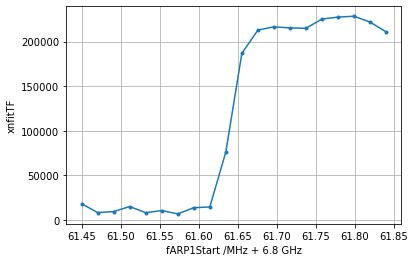

In [2]:
# Normaler Plot eines beliebigen Parameters [0,0.3,31] 
# yErr gibt die Fehlerbalken an. Wenn man das nicht möchte, einfach 0 eintragen [34.5E6, 35.5E6, 51] 
xStart=61.84
xStop=61.45
xStep=float(xStart-xStop)/(num_measurements)
xvals=np.linspace(xStart,xStop,num_measurements)
yvals=data['xnfitTF']
yErr=standard_devs['xnfitTF']
plt.cla()
if yErr.any():
    plt.errorbar(xvals,yvals,yerr=yErr,fmt='.-')
else:
    plt.plot(xvals,yvals,'.-')
plt.xlabel("fARP1Start /MHz + 6.8 GHz")
plt.ylabel("xnfitTF")
#plt.title("")
plt.grid()
plt.savefig(savename)
plt.show()

# Resonance scan

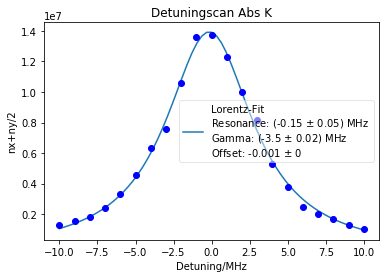

In [4]:
# Resonanzscan
# Mittelt ynFitGauss, xnFitGauss
# Resonanz wird mit Lorentzfit  genähert, kann in kHz oder MHz angegeben werden
# Dabei sind die xSteps immer in MHz angegeben wie in der Flugsoftware
units="MHz"
xStart=-10
xStop=10

xStep=float(xStart-xStop)/(num_measurements)
xvals=np.linspace(xStart,xStop,num_measurements)
yvals=(data['xnfitGauss']+data['xnfitGauss'])/2
#yErr=np.sqrt(np.multiply(standard_devs['xnfitGauss'],standard_devs['xnfitGauss'])+np.multiply(standard_devs['xnfitGauss'],standard_devs['ynfitGauss']))
xvals_genau=np.linspace(xStart,xStop,num_measurements*3)
popt_lor,pcov_lor=curve_fit(lorentz_fit,xvals,yvals,p0=[[0,6,10**8,1.0*10**8]])
plt.cla()
plt.errorbar(xvals,yvals,yerr=yErr,fmt='bo')
if units=="kHz":
    plt.plot(xvals_genau,lorentz_fit(xvals_genau,*popt_lor),label="Lorentz-Fit\nResonance: (%.4g $\pm$ %.4g) kHz \nGamma: (%.4g $\pm$ %.4g) MHz\nOffset: %.4g $\pm$ %.4g"%(round(popt_lor[0]*1000,2),round(np.sqrt(pcov_lor[0,0])*1000,2),round(popt_lor[1],2),round(pcov_lor[1,1],2),round(popt_lor[3]/(10E8),3),round(np.sqrt(pcov_lor[3,3])/(10E8),3)))
elif units=="MHz":
    #plt.plot(xvals_genau,gauss_fit(xvals_genau,*popt),label="Resonance: (%.4g $\pm$ %.4g) MHz\nStdDev: %.4g MHz \nOffset: %.4g"%(round(popt[0],2),round(np.sqrt(pcov[0,0]),2),round(popt[1],2),round(popt[3]/(10E8),2)))
    plt.plot(xvals_genau,lorentz_fit(xvals_genau,*popt_lor),label="Lorentz-Fit\nResonance: (%.4g $\pm$ %.4g) MHz \nGamma: (%.4g $\pm$ %.4g) MHz\nOffset: %.4g $\pm$ %.4g"%(round(popt_lor[0],2),round(np.sqrt(pcov_lor[0,0]),2),round(popt_lor[1],2),round(pcov_lor[1,1],2),round(popt_lor[3]/(10E8),3),round(np.sqrt(pcov_lor[3,3])/(10E8),3)))
    
plt.xlabel("Detuning/MHz")
plt.ylabel("nx+ny/2")
plt.title("Detuningscan Abs K")
plt.legend(loc=0,fancybox=True, framealpha=0.5)
plt.savefig(savename)
plt.show()

# Lifetime MOT

In [4]:
#Lebensdauer-Messung MOT
#Gibt den 1/e-Wert aus
t0=0 #in ms
tStep=500 # in ms pro Schritt

savename=os.path.basename(os.getcwd())+"lifetime.png"
how_many_points=num_measurements #Wenn man zB nur die ersten 10 Werte nehmen will, trage hier 10 ein. Für alle: num_measurements

xvals=np.linspace(t0,t0+tStep*(how_many_points-1),how_many_points)


yvals=data['xnfitGauss']
yerr=standard_devs['xnfitGauss']

popt,pcov=curve_fit(exp_decay,xvals,yvals,sigma=yerr,absolute_sigma=False,p0=[[2*10**8,1000]])

plt.cla()
plt.errorbar(xvals,yvals[0:how_many_points],yerr=yerr[0:how_many_points],fmt='bo',label="Measurement")
plt.semilogy(xvals,exp_decay(xvals,*popt),label="Lifetime Fit 1/e: ("+str(round(popt[1],1))+"$\pm$"+str(round(np.sqrt(pcov[1,1]),1))+") ms")
plt.ylim(10**7,10**9)
plt.xlabel("time (ms)")
plt.ylabel("xnfitGauss")

plt.legend(loc=1,fancybox=True, framealpha=0.5)
plt.grid()
plt.savefig(savename)

# 2D-Plot with colors

[[ 1505826.  3582649.  4127534.  2973707.  2261340.  2011554.]
 [ 2906022.  4834520.  4517346.  4766558.    20315.  2564695.]
 [ 3357096.  5687685.  5557892.  6708839.  3570685.  2803125.]
 [ 4090417.  6262596.  7506236.  6593198.  5102649.  3278026.]
 [ 4039683.  6052334.  6655426.  6556526.  4676924.  3194827.]
 [ 3606524.  5437041.  6785284.  5037466.  4373384.  3741629.]]
x/Tile:  [-0.3 -0.4 -0.5 -0.6 -0.7 -0.8]
y/Repeat:  [-0.7 -0.8 -0.9 -1.  -1.1 -1.2]
Parameter:  ynfitGauss


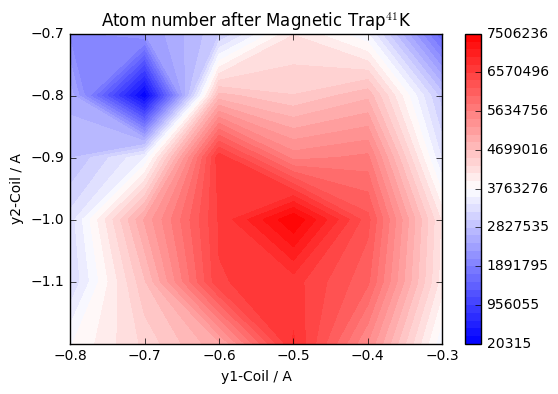

Maxima bei:
x: -0.5
y: -1.0


In [2]:
# 2D-Plot mit Farben
xvon=-0.3 #Tile-Wert
xbis=-0.8
yvon=-0.7 #Repeat-Wert
ybis=-1.2
xsteps=6
ysteps=6
normalize=False
parameter='ynfitGauss'
num_matrix=data[parameter].reshape((ysteps,xsteps))
print(num_matrix)
if normalize==1:
  num_matrix/=np.max(num_matrix)
  upperBound=1
  lowerBound=0
else:
  upperBound=np.max(num_matrix)
  lowerBound=np.min(num_matrix)
xvals=np.linspace(xvon,xbis,xsteps)
yvals=np.linspace(yvon,ybis,ysteps)
levels = np.linspace(lowerBound, upperBound, 41)
fig, ax = plt.subplots()
cs = ax.contourf(xvals,yvals, num_matrix, levels=levels, cmap=plt.cm.bwr)
print("x/Tile: ",xvals)
print("y/Repeat: ",yvals)
print("Parameter: ",parameter)
cbar = fig.colorbar(cs)
plt.xlabel("y1-Coil / A")
plt.ylabel("y2-Coil / A")
plt.title("Atom number after Magnetic Trap$^{41}$K")
plt.savefig(savename)
plt.show()
maxima_vals=np.unravel_index(np.argmax(num_matrix), (xsteps,ysteps))
print("Maxima bei:")
print("x: "+str(xvals[maxima_vals[1]]))
print("y: "+str(yvals[maxima_vals[0]]))

# 3D-Scans with color

In [9]:
# 3D-Scans
xsteps=6
ysteps=11
zsteps=7
normalize=False
parameter='xnfitGauss'
x_parameter_name="x-Mel"
y_parameter_name="y-Mel/A"
z_parameter_name="z-Mel/A"
num_matrix=data[parameter].reshape((xsteps,ysteps,zsteps))

if normalize==1:
  num_matrix/=np.max(num_matrix)
  upperBound=1
  lowerBound=0
else:
  upperBound=np.max(num_matrix)
  lowerBound=np.min(num_matrix)
    
xvals=np.linspace(-0.15,0.15,xsteps)
yvals=np.linspace(-0.1,0.1,ysteps)
zvals=np.linspace(-0.3,0.3,zsteps)
levels = np.linspace(lowerBound, upperBound, 41)

print("||"+x_parameter_name+"||Bild||Maximum||"+y_parameter_name+"||"+z_parameter_name+"||")
for i in range(xsteps):
    fig, ax = plt.subplots()    
    plt.cla()
    cs = ax.contourf(zvals,yvals, num_matrix[i,:,:], levels=levels, cmap=plt.cm.bwr)
    cbar = fig.colorbar(cs)
    plt.xlabel(z_parameter_name)
    plt.ylabel(y_parameter_name)
    plt.title(parameter+", "+x_parameter_name+"_"+str(xvals[i]))
    filename=x_parameter_name+"_"+str(xvals[i])+".png"
    plt.savefig(filename)
    maxima_vals=np.unravel_index(np.argmax(num_matrix[i,:,:]), (ysteps,zsteps))    
    print("||"+str(xvals[i])+"||[[Image("+filename+",300)]]||"+str(round(np.max(num_matrix[i,:,:])/1000000,2))+"||"+str(yvals[maxima_vals[0]])+"||"+str(zvals[maxima_vals[1]])+"||")


||x-Mel||Bild||Maximum||y-Mel/A||z-Mel/A||
||-0.15||[[Image(x-Mel_-0.15.png,300)]]||6.21||0.04||0.2||
||-0.09||[[Image(x-Mel_-0.09.png,300)]]||7.16||0.04||0.2||
||-0.03||[[Image(x-Mel_-0.03.png,300)]]||7.81||-0.02||0.2||
||0.03||[[Image(x-Mel_0.03.png,300)]]||7.81||0.04||0.2||
||0.09||[[Image(x-Mel_0.09.png,300)]]||7.66||0.0||0.2||
||0.15||[[Image(x-Mel_0.15.png,300)]]||5.37||0.02||0.2||


# Loading curve

C:\Users\Baptist\anaconda3\lib\site-packages\ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in sqrt


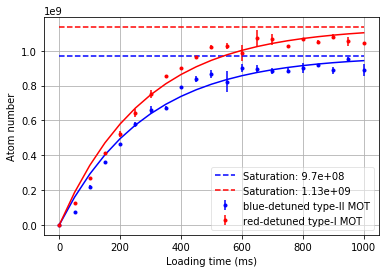

217279695.0


In [30]:
# Ladekurve
t0=0
tEnd=1000
data, standard_devs, header, names, units=processResultFile("results_Gauss_blueMOT.txt",3)
datared, standard_devsred, header, names, units=processResultFile("results_Gauss_redMOT.txt",3)
xvals=np.linspace(t0,tEnd,num_measurements)
yvals=(data['xnfitGauss']+data['xnfitGauss'])/2
yErrBlue=standard_devs['xnfitGauss']

yvalsred=(datared['xnfitGauss']+datared['xnfitGauss'])/2
yErrRed=standard_devsred['xnfitGauss']

popt, pcov = curve_fit(loading_fit,xvals,yvals,p0=[[10**8,1000]])
poptred, pcovred = curve_fit(loading_fit,xvals,yvalsred,p0=[[10**8,1000]])
plt.cla()

plt.errorbar(xvals,yvals,yerr=yErrBlue,fmt="b.",label="blue-detuned type-II MOT")
plt.plot(xvals,loading_fit(xvals,*popt),'b-')
#plt.plot(xvals[:3],d_loading_fit(xvals[:3],*popt),'b--',label="Loading: %.4g"%round(popt[0]/popt[1]*1000,0))
plt.plot(xvals[:],xvals[:]*0+popt[0],'b--',label="Saturation: %.3g"%popt[0])

plt.errorbar(xvals,yvalsred,yerr=yErrRed,fmt="r.",label="red-detuned type-I MOT")
plt.plot(xvals,loading_fit(xvals,*poptred),'r-')
#plt.plot(xvals[:3],d_loading_fit(xvals[:3],*poptred),'r--',label="Loading: %.4g"%round(poptred[0]/poptred[1]*1000,0))
plt.plot(xvals[:],xvals[:]*0+poptred[0],'r--',label="Saturation: %.3g"%poptred[0])

plt.xlabel("Loading time (ms)")
plt.ylabel("Atom number")
plt.grid(True)
plt.legend(loc=4,fancybox=True, framealpha=0.5)
plt.savefig(savename,dpi=300)
plt.show()
print(yvals[2])

# ToF

C:\Users\Baptist\anaconda3\lib\site-packages\ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in sqrt


[0.01164303 0.02800439 0.06408408 0.09965462 0.11839473 0.12499095
 0.07256487 0.05287392 0.01755351]
RedX:  1.3013122680041727 +- 0.06456024509396978
RedY:  1.3581389655997722 +- 0.016445182840629926
geom:  1.3294220163625547 +- 0.033945419368530946
BlueX:  0.037810496308099115 +- 0.0010763938492445101
BlueY:  0.052315362424551974 +- 0.0016094249341747375
geom:  0.04447549682477296 +- 0.0009320911789171961


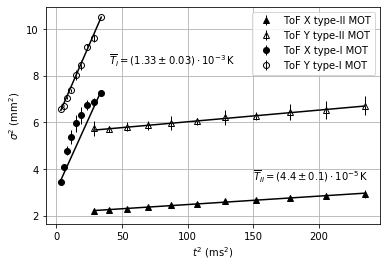

In [16]:

#TOF-Auswertung
dimension=1 #Wenn nur der Sigma-x-Wert genommen wird, dann 1. Wenn se 2D ist, dann 2 etc.
t0=1.84 #in ms
tStep=0.5
mass=87 #in u
kB=1.3806*10**(-23)
mass_SI=mass*1.6605*10**(-27) #in kg

how_many_points=9
dataRedX, standard_devsRedX, header, names, units=processResultFile("results_neu_rot_x_Gauss.txt",3)
dataRedY, standard_devsRedY, header, names, units=processResultFile("results_neu_rot_y_Gauss.txt",3)

savename=os.path.basename(os.getcwd())+"ToF_neu.png"
xvalsRed=np.linspace(t0,t0+tStep*(how_many_points-1),how_many_points)**2
dataBlueX, standard_devsBlueX, header, names, units=processResultFile("results_neu_blueX_Gauss.txt",4)
dataBlueY, standard_devsBlueY, header, names, units=processResultFile("results_neu_blueY_Gauss.txt",4)
t0Blue=5.34
tStepBlue=1.0
how_many_pointsBlue=11
xvalsBlue=np.linspace(t0Blue,t0Blue+tStepBlue*(how_many_pointsBlue-1),how_many_pointsBlue)**2
yvalsBlueX=dataBlueX['xsigmaGauss']**2
yvalsBlueY=dataBlueY['ysigmaGauss']**2
yerrBlueX=2*dataBlueX['xsigmaGauss']*standard_devsBlueX['xsigmaGauss']
yerrBlueY=2*dataBlueY['ysigmaGauss']*standard_devsBlueY['ysigmaGauss']

yvalsRedX=dataRedX['xsigmaGauss']**2
yvalsRedY=dataRedY['ysigmaGauss']**2
yerrRedX=2*dataRedX['xsigmaGauss']*standard_devsRedX['xsigmaGauss']
yerrRedY=2*dataRedY['ysigmaGauss']*standard_devsRedY['ysigmaGauss']
print(yerrRedX[0:how_many_points]/10**6)

poptRedX,pcovRedX=curve_fit(lin_fit,xvalsRed,yvalsRedX[0:how_many_points],sigma=yerrRedX[0:how_many_points],absolute_sigma=False,p0=[[1600,1000]])
poptRedY,pcovRedY=curve_fit(lin_fit,xvalsRed,yvalsRedY[0:how_many_points],sigma=yerrRedY[0:how_many_points],absolute_sigma=False,p0=[[1600,1000]])
poptBlueX,pcovBlueX=curve_fit(lin_fit,xvalsBlue,yvalsBlueX[0:how_many_pointsBlue],sigma=yerrBlueX[0:how_many_pointsBlue],absolute_sigma=False,p0=[[1600,1000]])
poptBlueY,pcovBlueY=curve_fit(lin_fit,xvalsBlue,yvalsBlueY[0:how_many_pointsBlue],sigma=yerrBlueY[0:how_many_pointsBlue],absolute_sigma=False,p0=[[1600,1000]])

sigmavRedX=np.sqrt(poptRedX[0])/1000 #in m/s
sigmaerrRedX=1/(2*np.sqrt(poptRedX[0]))*np.sqrt(pcovRedX[0,0])/1000
temperaturRedX=mass_SI*sigmavRedX**2 / kB / dimension
temp_errRedX=2*mass_SI*sigmavRedX*sigmaerrRedX / kB / dimension

sigmavRedY=np.sqrt(poptRedY[0])/1000 #in m/s
sigmaerrRedY=1/(2*np.sqrt(poptRedY[0]))*np.sqrt(pcovRedY[0,0])/1000
temperaturRedY=mass_SI*sigmavRedY**2 / kB / dimension
temp_errRedY=2*mass_SI*sigmavRedY*sigmaerrRedY / kB / dimension
temp_geom_Red=np.sqrt(temperaturRedX*temperaturRedY)
temp_geom_RedErr=np.sqrt((0.5*np.sqrt(temperaturRedY)*temp_errRedX/np.sqrt(temperaturRedX))**2+(0.5*np.sqrt(temperaturRedX)*temp_errRedY/np.sqrt(temperaturRedY))**2)

sigmavBlueX=np.sqrt(poptBlueX[0])/1000 #in m/s
sigmaerrBlueX=1/(2*np.sqrt(poptBlueX[0]))*np.sqrt(pcovBlueX[0,0])/1000
temperaturBlueX=mass_SI*sigmavBlueX**2 / kB / dimension
temp_errBlueX=2*mass_SI*sigmavBlueX*sigmaerrBlueX / kB / dimension

sigmavBlueY=np.sqrt(poptBlueY[0])/1000 #in m/s
sigmaerrBlueY=1/(2*np.sqrt(poptBlueY[0]))*np.sqrt(pcovBlueY[0,0])/1000
temperaturBlueY=mass_SI*sigmavBlueY**2 / kB / dimension
temp_errBlueY=2*mass_SI*sigmavBlueY*sigmaerrBlueY / kB / dimension
temp_geom_Blue=np.sqrt(temperaturBlueX*temperaturBlueY)
temp_geom_BlueErr=np.sqrt((0.5*np.sqrt(temperaturBlueY)*temp_errBlueX/np.sqrt(temperaturBlueX))**2+(0.5*np.sqrt(temperaturBlueX)*temp_errBlueY/np.sqrt(temperaturBlueY))**2)

print("RedX: ", temperaturRedX*1000, "+-", temp_errRedX*1000)
print("RedY: ", temperaturRedY*1000, "+-", temp_errRedY*1000)
print("geom: ", temp_geom_Red*1000, "+-", temp_geom_RedErr*1000)

print("BlueX: ", temperaturBlueX*1000, "+-", temp_errBlueX*1000)
print("BlueY: ", temperaturBlueY*1000, "+-", temp_errBlueY*1000)
print("geom: ", temp_geom_Blue*1000, "+-", temp_geom_BlueErr*1000)


plt.cla()
#plt.plot(xvalsBlue,lin_fit(xvalsBlue,*poptBlueX)/10**6,"white",label="Temp Blue blabla")
plt.plot(xvalsBlue,lin_fit(xvalsBlue,*poptBlueX)/10**6,"black")
plt.errorbar(xvalsBlue,yvalsBlueX[0:how_many_pointsBlue]/10**6,yerr=3*yerrBlueX[0:how_many_pointsBlue]/10**6,marker='^',color='black',linewidth=1.0,linestyle="none",label="ToF X type-II MOT")

plt.plot(xvalsBlue,lin_fit(xvalsBlue,*poptBlueY)/10**6,"white")
plt.plot(xvalsBlue,lin_fit(xvalsBlue,*poptBlueY)/10**6,"black")
plt.errorbar(xvalsBlue,yvalsBlueY[0:how_many_pointsBlue]/10**6,yerr=3*yerrBlueY[0:how_many_pointsBlue]/10**6,marker='^',fillstyle='none',color='black',linewidth=1.0,linestyle="none",label="ToF Y type-II MOT")

#plt.plot(xvalsRed,lin_fit(xvalsRed,*poptRedX)/10**6,"white",label="Temp Red blabla")
plt.plot(xvalsRed,lin_fit(xvalsRed,*poptRedX)/10**6,"black")
plt.errorbar(xvalsRed,yvalsRedX[0:how_many_points]/10**6,yerr=3*yerrRedX[0:how_many_points]/10**6,marker='o',color='black',linewidth=1.0,linestyle="none",label="ToF X type-I MOT")

plt.plot(xvalsRed,lin_fit(xvalsRed,*poptRedY)/10**6,"white")
plt.plot(xvalsRed,lin_fit(xvalsRed,*poptRedY)/10**6,"black")
plt.errorbar(xvalsRed,yvalsRedY[0:how_many_points]/10**6,yerr=3*yerrRedY[0:how_many_points]/10**6,marker='o',fillstyle='none',color='black',linewidth=1.0,linestyle="none",label="ToF Y type-I MOT")

plt.xlabel("$t^2$ ($\mathrm{ms}^2$)")
plt.ylabel("$\sigma^2$ ($\mathrm{mm}^2$)")
plt.text(150,3.5,"$\overline{T}_{II}=(4.4\pm 0.1)\cdot10^{-5}\,$K")
plt.text(40,8.5,"$\overline{T}_{I}=(1.33\pm 0.03)\cdot10^{-3}\,$K")
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

plt.grid()
plt.savefig(savename,dpi=300)
plt.show()


# Molasses Scans

In [10]:
#Melasse-Scans Auswertung
ToFStart=2
ToFEnde=10
ToFStep=2
ToFZahl=(ToFEnde-ToFStart)/ToFStep+1
dimension=1
AnzahlScans=num_measurements/(ToFZahl)
ParamStart=0.1
ParamStop=0.0
ParamStep=(ParamStop-ParamStart)/(AnzahlScans-1)

mass=87 #in u
kB=1.3806*10**(-23)
mass_SI=mass*1.6605*10**(-27) #in kg
xvals=np.linspace(ToFStart,ToFEnde,ToFZahl)
yvals=data['xsigmaGauss']
yerr=data['xsigmaGaussErr']
Teilchenzahlen=(data['xnfitGauss'])
AnzahlScans=int(AnzahlScans)
ToFZahl=int(ToFZahl)
print("||Messung#||TempX/uK||xnfit||PSD||")
values_graph=np.zeros((AnzahlScans,5))
for i in range(AnzahlScans):
    try:
        popt,pcov=curve_fit(tof_fit,xvals,yvals[(i*ToFZahl):((i+1)*ToFZahl)],sigma=yerr[(i*ToFZahl):((i+1)*ToFZahl)],absolute_sigma=False,p0=[[1500,80]])
        sigmav=popt[1]/1000 #in m/s
        sigmaerr=np.sqrt(pcov[1,1])/1000
        temperatur=mass_SI*sigmav**2 / kB / dimension
        temp_err=2*mass_SI*sigmav*sigmaerr / kB / dimension
        Teilchenzahl=np.mean(Teilchenzahlen[(i*ToFZahl):((i+1)*ToFZahl)])
        TeilchenzahlStd=np.std(Teilchenzahlen[(i*ToFZahl):((i+1)*ToFZahl)])
        sigma0=tof_fit(0,*popt)
        PSD=PSD_Simple(temperatur,sigma0,Teilchenzahl,mass)
        temp=round(temperatur*1000000,1)
        temperr=round(temp_err*1000000,1)
        values_graph[i,0]=temp
        values_graph[i,1]=temperr
        values_graph[i,2]=Teilchenzahl
        values_graph[i,3]=TeilchenzahlStd
        values_graph[i,4]=PSD
        print("||"+str(ParamStart+ParamStep*i)+"||("+str(round(temperatur*1000000,1))+"+-"+str(round(temp_err*1000000,1))+")||"+str(round(Teilchenzahl/1000000,1))+"+-"+str(round(TeilchenzahlStd/1000000,1))+"||%.2g||"%PSD)
    except RuntimeError: #konvergiert nicht
        print("||"+str(ParamStart+ParamStep*i)+"||konvergiert nicht||"+str(round(Teilchenzahl/1000000,1))+"+-"+str(round(TeilchenzahlStd/1000000,1))+"||")
        continue
# Hier noch ein Plot der Daten
xStart=ParamStart
xStop=ParamStart+ParamStep*(AnzahlScans-1)
xStep=float(xStart-xStop)/(AnzahlScans)
xvals=np.linspace(xStart,xStop,AnzahlScans)
yvals1=values_graph[:,0]
yErr=values_graph[:,1]
yvals2=values_graph[:,2]
yErr2=values_graph[:,3]

fig, ax1 = plt.subplots()
ax1.cla()
ax2=ax1.twinx()
ax2.set_ylabel("Number of atoms")

ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
if yErr.any():
    ax1.errorbar(xvals,yvals1,yerr=yErr,fmt='bo',label="Temperature")
    ax2.errorbar(xvals,yvals2,yerr=yErr2,fmt='ro',label="Number of atoms")
else:
    ax1.plot(xvals,yvals1,'bo',label="Temperature")
    ax2.plot(xvals,yvals2,'ro',label="Number of atoms")
ax1.set_xlabel("RF-Amp/MHz")
ax1.set_ylabel("Temp Y/uK")
plt.title("Temperature and particle number")
ax1.legend(loc=0,fancybox=True, framealpha=0.5)
ax2.legend(loc=1,fancybox=True, framealpha=0.5)
plt.savefig(savename)

plt.clf()
plt.xlabel("RF-Amp/MHz")
plt.ylabel("PSD")
plt.plot(xvals,values_graph[:,4],'bo',label="PSD")
plt.savefig("PSD_"+savename)
plt.show()

||Messung#||TempX/uK||xnfit||PSD||
||0.1||(43.9+-9.5)||0.9+-0.1||2.1e-06||
||0.09||(66.1+-6.3)||0.9+-0.2||2.7e-05||
||0.08||(79.6+-7.9)||1.1+-0.2||1.3e-05||
||0.07||(84.0+-10.5)||1.4+-0.2||1.3e-06||
||0.06||(80.1+-6.8)||2.1+-0.2||4e-07||
||0.05||(95.8+-6.0)||2.9+-0.3||4.8e-07||
||0.04||(112.3+-6.1)||4.1+-0.6||7.5e-07||
||0.03||(127.5+-4.9)||6.0+-0.9||1.4e-06||
||0.02||(141.4+-3.6)||8.7+-1.5||2.1e-06||
||0.01||(160.6+-2.3)||12.1+-2.3||3.1e-06||
||0.0||(174.1+-2.7)||967335.3+-1934645.1||0.26||


# ToF-Startevaporation

In [21]:
#TOF-Auswertung für ersten Punkt auf Gamma-Kurve
dimension=1 #Wenn nur der Sigma-x-Wert genommen wird, dann 1. Wenn se 2D ist, dann 2 etc.
t0=1.3 #in ms
tStep=2
mass=87 #in u

savename=os.path.basename(os.getcwd())+"ToFy.png"
how_many_points=num_measurements #Wenn man zB nur die ersten 10 Werte nehmen will, trage hier 10 ein. Für alle: num_measurements
kB=1.3806*10**(-23)
mass_SI=mass*1.6605*10**(-27) #in kg
xvals=np.linspace(t0,t0+tStep*(how_many_points-1),how_many_points)
yvals=data['xsigmaGauss']
yvals2=data['ysigmaGauss']
yerr=data['xsigmaGaussErr']
yerr2=data['ysigmaGaussErr']
popt,pcov=curve_fit(tof_fit,xvals,yvals[0:how_many_points],sigma=yerr[0:how_many_points],absolute_sigma=False,p0=[[1600,1000]])
popt2,pcov2=curve_fit(tof_fit,xvals,yvals2[0:how_many_points],sigma=yerr2[0:how_many_points],absolute_sigma=False,p0=[[1600,1000]])
sigmav=popt[1]/1000 #in m/s
sigmav2=popt2[1]/1000 #in m/s
sigmaerr=np.sqrt(pcov[1,1])/1000
sigmaerr2=np.sqrt(pcov2[1,1])/1000
temperatur=mass_SI*sigmav**2 / kB / dimension
temperatur2=mass_SI*sigmav2**2 / kB / dimension
temp_err=2*mass_SI*sigmav*sigmaerr / kB / dimension
temp_err2=2*mass_SI*sigmav2*sigmaerr2 / kB / dimension
temperaturmean=(temperatur+temperatur2)/2
temperaturmeanErr=np.sqrt(temp_err**2+temp_err2**2)
plt.cla()
plt.errorbar(xvals,yvals[0:how_many_points],yerr=yerr[0:how_many_points],fmt='bo',label="ToF")
plt.fill_between(xvals,tof_fit(xvals,popt[0],popt[1]-np.sqrt(pcov[1,1])),tof_fit(xvals,popt[0],popt[1]+np.sqrt(pcov[1,1])),alpha=0.5,color='grey',label="T=("+str(round(temperatur*1000000,1))+"$\pm$"+str(round(temp_err*1000000,1))+")uK")
plt.xlabel("Zeit (ms)")
plt.ylabel("Sigma y ($\mu$m)")
plt.legend(loc=4,fancybox=True, framealpha=0.5)
plt.grid()
plt.savefig(savename)
#print np.mean(data['ynfitGauss'])
plt.show()

#PSD-Bestimmung
sigma0=tof_fit(0,*popt) #Nehme Sigma-Breite zum Zeitpunkt t=0
sigma0_2=tof_fit(0,*popt2)
xnfit=data['xnfitGauss']
ynfit=data['ynfitGauss']
anzahl=np.mean(data['xnfitGauss'])
anzahlerr=np.mean(data['xnfitGaussErr'])

PSD,err=PSD_mean(temperaturmean,temperaturmeanErr,sigma0,sigma0_2,anzahl,anzahlerr,mass)
PSDGauss=PSD_PeakDensity(temperaturmean,sigma0,sigma0_2,anzahl,mass)
wx=2*math.pi*24
wy=2*math.pi*382
wz=2*math.pi*382

PSDfreq=PSDTrapFrequencies(temperaturmean,wx,wy,wz,anzahl)
print("PSD_M1=%.4g"%PSD)
print("PSD_Freq=%.4g"%PSDfreq)
print("PSD_peakdensity=%.4g"%PSDGauss)
print("nMean=%.4g"%np.mean(data['xnfitGauss']))

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: invalid value encountered in sqrt


1.32298912138e+16
PSD_M1=3.859e-07
PSD_Freq=9.268e-06
PSD_peakdensity=7.697e-08
nMean=3.039e+07


# Evaporation

In [9]:
#Basiert auf Molasses-Scans, berechnet aber noch das Gamma (Die Evaporationseffizienz)
#Kann zb für RF-Scans benutzt werden
ToFStart=1.3
ToFEnde=3.8
ToFStep=0.5
ToFZahl=(ToFEnde-ToFStart)/ToFStep+1
dimension=1
AnzahlScans=num_measurements/(ToFZahl)
ParamStart=6
ParamStop=3
ParamStep=(ParamStop-ParamStart)/(AnzahlScans-1)
ScanParameterName="RF-Endfrequenz/MHz" #Erscheint dann in den Diagrammen
PSD0=5.4*10**(-6)
N0=1.2*10**6
mass=87 #in u
kB=1.3806*10**(-23)
mass_SI=mass*1.6605*10**(-27) #in kg
xvals=np.linspace(ToFStart,ToFEnde,ToFZahl)
yvals=data['xsigmaGauss']
yerr=data['xsigmaGaussErr']
y2vals=data['ysigmaGauss']
y2err=data['ysigmaGaussErr']
Teilchenzahlen=(data['xnfitGauss'])
AnzahlScans=int(AnzahlScans)
ToFZahl=int(ToFZahl)
print("||Messung#||TempMean/uK||xnfit||PSD||Gamma||")
values_graph=np.zeros((AnzahlScans,7))
wx=2*math.pi*24
wy=2*math.pi*382
wz=2*math.pi*382
for i in range(AnzahlScans):
    try:
        popt,pcov=curve_fit(tof_fit,xvals,yvals[(i*ToFZahl):((i+1)*ToFZahl)],sigma=yerr[(i*ToFZahl):((i+1)*ToFZahl)],absolute_sigma=False,p0=[[1500,80]])
        popt2,pcov2=curve_fit(tof_fit,xvals,y2vals[(i*ToFZahl):((i+1)*ToFZahl)],sigma=y2err[(i*ToFZahl):((i+1)*ToFZahl)],absolute_sigma=False,p0=[[1500,80]])
        sigmav=popt[1]/1000 #in m/s
        sigmav2=popt2[1]/1000 #in m/s
        sigmaerr=np.sqrt(pcov[1,1])/1000
        sigmaerr2=np.sqrt(pcov2[1,1])/1000
        temperatur=mass_SI*sigmav**2 / kB / dimension
        temperatur2=mass_SI*sigmav2**2 / kB / dimension
        temp_err=2*mass_SI*sigmav*sigmaerr / kB / dimension
        temp_err2=2*mass_SI*sigmav2*sigmaerr2 / kB / dimension
        Teilchenzahl=np.mean(Teilchenzahlen[(i*ToFZahl):((i+1)*ToFZahl)])
        TeilchenzahlStd=np.std(Teilchenzahlen[(i*ToFZahl):((i+1)*ToFZahl)])
        sigma0=tof_fit(0,*popt)
        sigma0_2=tof_fit(0,*popt2)
        temperaturmean=(temperatur+temperatur2)/2
        temp_err_mean=np.sqrt(temp_err*temp_err+temp_err2*temp_err2)
        #PSD,PSDerr=PSD_mean(temperaturmean,temp_err_mean,sigma0,sigma0_2,Teilchenzahl,TeilchenzahlStd,mass)
        PSD=PSDTrapFrequencies(temperaturmean,wx,wy,wz,Teilchenzahl)        
        temp=round(temperaturmean*1000000,1)
        temperr=round(temp_err_mean*1000000,1)
        Gamma=-np.log10(PSD/PSD0)/np.log10(Teilchenzahl/N0)
        values_graph[i,0]=temp
        values_graph[i,1]=temperr
        values_graph[i,2]=Teilchenzahl
        values_graph[i,3]=TeilchenzahlStd
        values_graph[i,4]=PSD
        #values_graph[i,5]=PSDerr
        values_graph[i,6]=Gamma
        print("||"+str(ParamStart+ParamStep*i)+"||("+str(round(temperaturmean*1000000,1))+"+-"+str(round(temp_err_mean*1000000,1))+")||"+str(round(Teilchenzahl/1000000,1))+"+-"+str(round(TeilchenzahlStd/1000000,1))+"||%.2g||"%PSD+"%.2g||"%Gamma)
    except RuntimeError: #konvergiert nicht
        print("||"+str(ParamStart+ParamStep*i)+"||konvergiert nicht||"+str(round(Teilchenzahl/1000000,1))+"+-"+str(round(TeilchenzahlStd/1000000,1))+"||")
        continue
# Hier noch ein Plot der Daten
xStart=ParamStart
xStop=ParamStart+ParamStep*(AnzahlScans-1)
xStep=float(xStart-xStop)/(AnzahlScans)
xvals=np.linspace(xStart,xStop,AnzahlScans)
yvals1=values_graph[:,0]
yErr=values_graph[:,1]
yvals2=values_graph[:,2]
yErr2=values_graph[:,3]

fig, ax1 = plt.subplots()
ax1.cla()
ax2=ax1.twinx()
ax2.set_ylabel("Number of atoms")

ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
if yErr.any():
    ax1.errorbar(xvals,yvals1,yerr=yErr,fmt='bo',label="Temperature")
    ax2.errorbar(xvals,yvals2,yerr=yErr2,fmt='ro',label="Number of atoms")
else:
    ax1.plot(xvals,yvals1,'bo',label="Temperature")
    ax2.plot(xvals,yvals2,'ro',label="Number of atoms")
ax1.set_xlabel(ScanParameterName)
ax1.set_ylabel("Temp X/uK")
plt.title("Temperature and particle number")
ax1.legend(loc=1,fancybox=True, framealpha=0.5)
ax2.legend(loc=2,fancybox=True, framealpha=0.5)
plt.savefig(savename)
plt.show()

fig,ax=plt.subplots()
ax.cla()
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(ScanParameterName)
plt.ylabel("PSD")
plt.plot(xvals,values_graph[:,4],'bo',label="PSD")
plt.title("PSD over RF")
plt.savefig("PSD_"+savename)
plt.show()

plt.clf()
plt.xlabel(ScanParameterName)
plt.ylabel("Gamma")
plt.title("Gamma over RF")
plt.plot(xvals,values_graph[:,6],'bo',label="PSD")
plt.savefig("Gamma_"+savename)
plt.show()

||Messung#||TempMean/uK||xnfit||PSD||Gamma||
||6.0||(28.2+-2.9)||0.9+-0.0||1.6e-05||4.5||
||5.5||(27.8+-2.1)||0.8+-0.0||1.5e-05||2.6||
||5.0||(27.0+-1.7)||0.7+-0.0||1.3e-05||1.5||
||4.5||(23.9+-1.5)||0.6+-0.0||1.6e-05||1.5||
||4.0||(22.3+-1.6)||0.5+-0.0||1.7e-05||1.3||
||3.5||(19.7+-1.0)||0.4+-0.0||2.1e-05||1.3||
||3.0||(18.9+-1.1)||0.3+-0.0||2e-05||1||


# n-D Scans

In [ ]:
#4-D Scans
import numpy as np
param1start=-2
param1ende=-10
param1steps=9

param2start=0.05
param2ende=0.00
param2steps=11

param3start=0
param3ende=4
param3steps=5



a=np.linspace(-2,-10,9)
b=np.linspace(0.05,0.00,11)
c=np.linspace(0,4,5)


CoolDet=np.repeat(np.tile(np.linspace(-2,-10,9),1),11*5)
CoolDetMid=np.repeat(np.tile(np.linspace(-7.5,-11.5,9),1),11*5)
CoolInt=np.repeat(np.tile(np.linspace(0.05,0.00,11),9),5)
ToF=np.repeat(np.tile(np.linspace(0,4,5),9*11),1)




'''
normalize=False
parameter='xnfitGauss'
maximum=np.max(data[parameter])
argmaximum=np.argmax(data[parameter])
print "Maximum bei folgenden Parametern: ",a[argmaximum],b[argmaximum],c[argmaximum],d[argmaximum]
'''

'''
messung=10
print ("Zugehörige Parameter zur Messung:\n")
print ("param1 = "+str(alist[messung]))
print ("param2 = "+str(blist[messung]))
print ("param3 = "+str(clist[messung]))
print ("param4 = "+str(dlist[messung]))
'''


# Life-Time in B-Trap

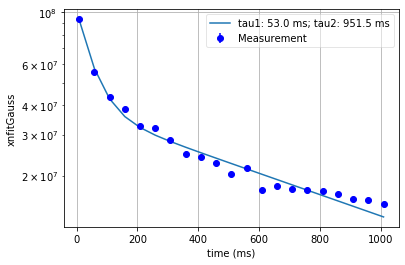

In [21]:
#Lebensdauer-Messung
t0=8.4 #in ms
tStep=50 # in ms pro Schritt
Trennungspunkt=5 #nach wie vielen Schritten hat man die Lebensdauer

savename=os.path.basename(os.getcwd())+"lifetime.png"
how_many_points=num_measurements #Wenn man zB nur die ersten 10 Werte nehmen will, trage hier 10 ein. Für alle: num_measurements

xvals=np.linspace(t0,t0+tStep*(how_many_points-1),how_many_points)
xvals1=xvals[0:Trennungspunkt]
xvals2=xvals[Trennungspunkt:]

yvals=data['xnfitGauss']
yvals1=yvals[0:Trennungspunkt]
yvals2=yvals[Trennungspunkt:]
yerr=standard_devs['xnfitGauss']
yerr1=yerr[0:Trennungspunkt]
yerr2=yerr[Trennungspunkt:]
popt1,pcov1=curve_fit(exp_decay,xvals1,yvals1,absolute_sigma=False,p0=[[10**7,10]])
popt2,pcov2=curve_fit(exp_decay,xvals2,yvals2,absolute_sigma=False,p0=[[10**6,50]])
popt3,pcov3=curve_fit(BTrap2ExpFunctions,xvals,yvals,p0=[10**8,10,10**7,50])

plt.cla()
plt.errorbar(xvals,yvals[0:how_many_points],yerr=yerr[0:how_many_points],fmt='bo',label="Measurement")
plt.semilogy(xvals,BTrap2ExpFunctions(xvals,*popt3),label='tau1: '+str(np.round(popt3[1],1))+' ms; tau2: '+str(np.round(popt3[3],1))+' ms')
plt.xlabel("time (ms)")
plt.ylabel("xnfitGauss")

plt.legend(loc=1,fancybox=True, framealpha=0.5)
plt.grid()
plt.savefig(savename)
plt.show()

 # Trap Oscillations

In [1]:
#Fallen-Oszillationen
t0=0.0 #in ms
tStep=0.1.0 #in ms
savename=os.path.basename(os.getcwd())+".png"
savenamefft=os.path.basename(os.getcwd())+"_fft.png"
how_many_points=num_measurements
direction="xcenter"
xvals=np.linspace(t0,t0+tStep*(how_many_points-1),how_many_points)
yvals=data[direction]
yErr=standard_devs[direction]
#TrapOscillation1Freq(x,off,amp1,f1,tau1,phi1)
fft=np.fft.rfft(yvals)
sampling_freq=1/(tStep/1000)
if (num_measurements%2)==0: #even number
    yvalsfft=fft[0:num_measurements/2]
    xvalsfft=np.linspace(0,sampling_freq/2,num_measurements/2)
else:
    yvalsfft=fft[0:(num_measurements-1)/2]
    xvalsfft=np.linspace(0,sampling_freq/2,(num_measurements-1)/2)
subarray=yvalsfft[1:]
maximum=np.argmax(np.abs(yvalsfft[1:]))
maxfreq=np.abs(xvalsfft[maximum])
print("Maximum bei: "+str(maxfreq)+" Hz")


plt.cla()
plt.bar(xvalsfft[1:],np.abs(yvalsfft[1:]),align='center',width=sampling_freq/num_measurements)
plt.title("FFT trap oscillations")
plt.xlabel("Frequency/Hz")
plt.ylabel("Amplitude/a.u.")
plt.xlim(0,sampling_freq/2+sampling_freq/num_measurements/2)
plt.ylim(0,np.max(np.abs(yvalsfft[1:]))*1.2)
plt.xticks(np.arange(0, sampling_freq/2+sampling_freq/num_measurements, sampling_freq/2/10))
plt.grid(True)

plt.savefig(savenamefft)
plt.show()

popt,pcov=curve_fit(TrapOscillation1Freq,xvals,yvals[0:how_many_points],sigma=yErr[0:how_many_points],absolute_sigma=False,p0=[[290,350,maxfreq,80,1]])
plt.cla()
plt.errorbar(xvals,yvals[0:how_many_points],yerr=yerr[0:how_many_points],fmt='bo',label="Scan")
plt.plot(xvals,TrapOscillation1Freq(xvals,*popt),label="Frequency: "+str(round(popt[2],2))+"$\pm$"+str(round(np.sqrt(pcov[2,2]),2))+" Hz")
plt.xlabel("Holding time/ms")
plt.ylabel(direction+"/um")
plt.title("Trap oscillations y=-2A SC+BC")
plt.legend(loc=0,fancybox=True, framealpha=0.5)
plt.savefig(savename)
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-284e7cb70f7b>, line 3)

# Scatterplot

In [35]:
x=data['xcenter']
y=data['ycenter']
xErr=standard_devs['xcenter']
yErr=standard_devs['ycenter']
labeltext="xCoil"
scanparam=np.linspace(-1,0,21)
plt.cla()
plt.scatter(x,y,label=labeltext)
plt.xlabel("xCenter")
plt.ylabel("yCenter")
for i in range(0,num_measurements,2):
    plt.text(x[i]+30,y[i]-15,"x="+str(scanparam[i]))
plt.legend(loc=0,fancybox=True, framealpha=0.5)
#plt.show()
savename=os.path.basename(os.getcwd())+"_"+labeltext+".png"
plt.savefig(savename)
plt.show()

# Oszillationen Scans

In [6]:
#Fallen-Oszillationen
t0=0.0 #in ms
tStep=0.1 #in ms
AnzahlToFSchritte=31
ToF=5.0 # in ms
Richtung='x' #x,y, oder z eingeben

xvals=np.linspace(t0,t0+tStep*(AnzahlToFSchritte-1),AnzahlToFSchritte)
ScanAnzahl=num_measurements/AnzahlToFSchritte

if Richtung=='x': #x
    savename=os.path.basename(os.getcwd())+"_xOsc.png"
    yvals=np.zeros((ScanAnzahl,AnzahlToFSchritte))
    yvals=data['xcenter'].reshape((ScanAnzahl,AnzahlToFSchritte))
    A_x=50 #in um
    w_x=150 #in Hz
    Phi_0=0.1 #in rad
    x_0=1300 #in um
    x_tau=50 #in ms
    popt=np.zeros((ScanAnzahl,5))
    
    for i in range(0,ScanAnzahl):
        OscFitReduced=lambda x, x_0, A_x,w_x,x_tau, Phi_0: TrapOscillationXInTrap(x, x_0, A_x,w_x,x_tau, Phi_0,ToF/1000.0)
        popt[i,:],pcov=curve_fit(OscFitReduced,xvals,yvals[i,:],p0=[[x_0,A_x,w_x,x_tau,Phi_0]])
        
    amplituden=np.abs(popt[:,1])
    frequenzen=np.abs(popt[:,2])
elif Richtung=='y': #y    
    savename=os.path.basename(os.getcwd())+"_yOsc.png"
    yvals=np.zeros((ScanAnzahl,AnzahlToFSchritte))
    yvals=data['ycenter'].reshape((ScanAnzahl,AnzahlToFSchritte))
    A_x=100 #in um
    w_x=100 #in Hz
    Phi_0=0.1 #in rad
    x_0=3000 #in um
    x_tau=30 #in ms
    popt=np.zeros((ScanAnzahl,5))
    
    for i in range(0,ScanAnzahl):
        OscFitReduced=lambda x, x_0, A_x,w_x,x_tau, Phi_0: TrapOscillationYInTrap(x, x_0, A_x,w_x,x_tau, Phi_0,ToF/1000.0)
        popt[i,:],pcov=curve_fit(OscFitReduced,xvals,yvals[i,:],p0=[[x_0,A_x,w_x,x_tau,Phi_0]])
        
    amplituden=np.abs(popt[:,1])
    frequenzen=np.abs(popt[:,2])
    
#Darstellung eines einzelnen fits
iteration=0  
plt.cla()
plt.plot(xvals,yvals[iteration,:],'bo-',label="Measurement")
plt.plot(xvals,OscFitReduced(xvals,*popt[iteration]),'ro-',label="Fit: "+str(np.round(popt[0,2],0))+" Hz")
plt.xlabel("Hold-Time")
plt.ylabel("xPos after 5ms ToF")
plt.legend(loc=0,fancybox=True, framealpha=0.5)
savename=os.path.basename(os.getcwd())+"_OSc.png"
plt.savefig(savename)
plt.show()

# 3D-Fit Fallenoszillationen

In [4]:
#3D-Fit-Fallenoszillationen

def TrapOscillation2FreqNoDamping(x,off,amp1,f1,phi1,amp2,f2,phi2):
    return off + amp1*np.sin(2*math.pi*f1*x/1000+phi1)+amp2*np.sin(2*math.pi*f2*x/1000+phi2)

def TrapOscillation3FreqNoDamping(x,off,amp1,f1,phi1,amp2,f2,phi2,amp3,f3,phi3):
    return off + amp1*np.sin(2*math.pi*f1*x/1000+phi1)+amp2*np.sin(2*math.pi*f2*x/1000+phi2)+amp3*np.sin(2*math.pi*f3*x/1000+phi3)

def MRotation3DX(w):
    return np.array(((1,0,0), (0, np.cos(w), -np.sin(w)) ,(0, np.sin(w), np.cos(w))))

def MRotation3DY(w):
    return np.array(([np.cos(w),0,np.sin(w)],[0, 1, 0],[-np.sin(w),0,np.cos(w)]))

def MRotation3DZ(w):
    return np.array(([np.cos(w),-np.sin(w),0],[np.sin(w), np.cos(w), 0],[0, 0, 1]))

def MProjektion():
    return np.array(([0,0,1],[-1/np.sqrt(2),1/np.sqrt(2),0]))

# Unabhängiger Fit zur ersten Abschätzung der Fitparameter
xvals=np.linspace(t0,t0+tStep*(how_many_points-1),how_many_points)
yvals=data["xcenter"]
yErr=standard_devs["xcenter"]

xOffset = np.mean(yvals)
Amp1 = 23.43
F1 = 98.38
Phi1 = 3.22
Tau1 = 1
Amp2 = 36.64
F2 = 93.14
Phi2 = 3.87
Tau2 = 1
Amp3 = 21.1193420
F3 = 20.7710654
Phi3 = -2.51376024

p0 = [xOffset,Amp1,F1,Phi1,Amp2,F2, Phi2]
popt,pcov=curve_fit(TrapOscillation2FreqNoDamping,xvals,yvals,sigma=yErr,absolute_sigma=False,p0=p0)

yvals=data["ycenter"]
yErr=standard_devs["ycenter"]
yOffset = np.mean(yvals)

p0 = [yOffset,Amp1,F1,Phi1,Amp2,F2, Phi2,Amp3,F3,Phi3]
popt,pcov=curve_fit(TrapOscillation3FreqNoDamping,xvals,yvals,sigma=yErr,absolute_sigma=False,p0=p0)

# 3D Fit
t = xvals[1:]
t2 = np.linspace(t[0],t[-1], 901)

yvals = np.vstack((data["xcenter"], data["ycenter"])).T
yvals = yvals[1:,:]
yErr = np.vstack((standard_devs["xcenter"], standard_devs["ycenter"])).T
yErr = yErr[1:,:]

xOffset = popt[0]
yOffset = np.mean(yvals[:,1])
ax = popt[1]
fx = popt[2]
phix = popt[3]
ay = popt[4]
fy = popt[5]
phiy = popt[6]
az = popt[7]
fz = popt[8]
phiz = popt[9]

w1 = 4.56176705e+01
w2 = -9.39375646e-01
w3 = 1.08426226e+01

# Schwingungsvektor
def SV(t, ax, fx, phix, ay, fy, phiy, az, fz, phiz):
    return np.array([ax*np.sin(2*np.pi*fx*t/1000+phix), ay*np.sin(2*np.pi*fy*t/1000+phiy), az*np.sin(2*np.pi*fz*t/1000+phiz)])

# Rotation und Projektion
def RotUndPro(t, xOffset, yOffset, ax, fx, phix, ay, fy, phiy, az, fz, phiz, w1, w2, w3):
    finalPos = MRotation3DZ(w3).dot(MRotation3DY(w2).dot(MRotation3DX(w1).dot(SV(t, ax, fx, phix, ay, fy, phiy, az, fz, phiz)))) # Testen
    output = MProjektion().dot(finalPos).T + np.array(([xOffset, yOffset])) # Testen
    return output.ravel() # Workaround mit .ravel(), besser drauf verzichten und direkt über leastsq gehen

p0 = [xOffset, yOffset, ax, fx, phix, ay, fy, phiy, az, fz, phiz, w1, w2, w3]
popt, pcov = curve_fit(RotUndPro, t, yvals.ravel(), p0=p0)

plt.cla()
fig, axs = plt.subplots(1,2)
axs[0].errorbar(t,yvals[:,0],yerr=yErr[:,0],fmt='o',label="Data")
axs[0].plot(t2, RotUndPro(t2, *popt).reshape(t2.shape[0],2)[:,0], label="Fit")
axs[0].legend()
axs[0].set_xlabel("Time /ms")
axs[0].set_ylabel(r"Center of BEC in x'-direction /$\mu$m")
axs[0].set_ylim(1210,1380)

axs[1].errorbar(t,yvals[:,1],yerr=yErr[:,1],fmt='o',label="Data")
axs[1].plot(t2, RotUndPro(t2, *popt).reshape(t2.shape[0],2)[:,1], label="Fit")
axs[1].legend()
axs[1].set_xlabel("Time /ms")
axs[1].set_ylabel(r"Center of BEC in y'-direction /$\mu$m")
axs[1].set_ylim(3610,3780)

fig.set_size_inches(12, 4)
plt.savefig("3DFit.png", dpi=300)
np.savetxt("3DFitResults.txt", np.array(([popt, [pcov[i,i] for i in range(pcov.shape[0])]])).transpose())
plt.show()

print(["Popt: ", str(popt)])

NameError: name 't0' is not defined

# Export Data to csv (for tikz)

In [1]:
savename=os.path.basename(os.getcwd())+"data"
path=os.path.abspath(os.getcwd())
xStart=0.36 # 1.46
xStop=40.36
xStep=float(xStart-xStop)/(num_measurements)
xvals=np.linspace(xStart,xStop,num_measurements)
yvals=data['xcenter']
yErr=standard_devs['xcenter']
np.savetxt(savename+".csv",np.transpose([xvals,yvals,yErr]),delimiter=',',header=path)


NameError: name 'os' is not defined